In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn import linear_model, discriminant_analysis, neighbors, tree, naive_bayes, svm
from sklearn import model_selection
from sklearn import metrics
import pickle
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier

### Preprocesado de datos

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y  # 0=setosa, 1=versicolor, 2=virginica
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
df.shape

(150, 5)

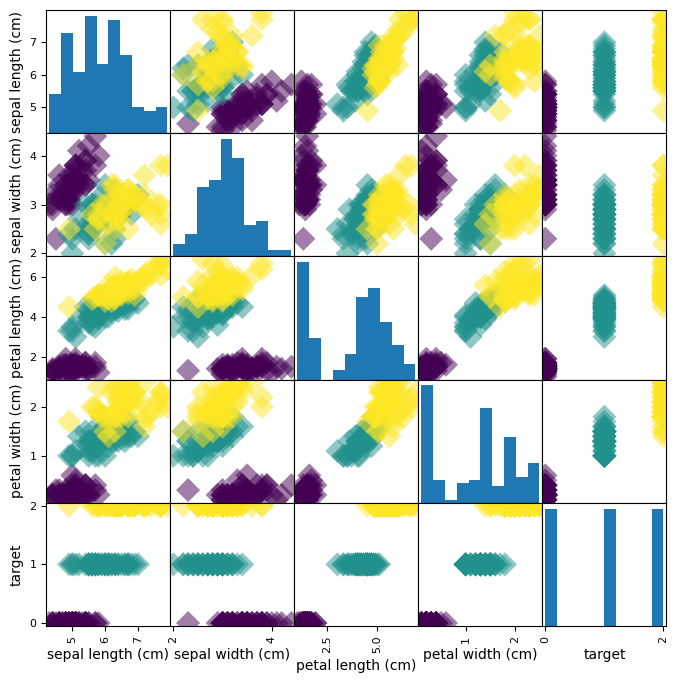

In [7]:
pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')
plt.show();

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

models = []
models.append(('LogR', linear_model.LogisticRegression()))
models.append(('LDA', discriminant_analysis.LinearDiscriminantAnalysis()))
models.append(('KNN', neighbors.KNeighborsClassifier()))
models.append(('DTree', tree.DecisionTreeClassifier()))
models.append(('NB', naive_bayes.GaussianNB()))
models.append(('SVM', svm.SVC()))

results = []
names = []
print("Model:\t\t\t Avg. Score\t\t Std Score")
kfold = model_selection.KFold(n_splits=10)
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name + '\t\t', str(cv_results.mean()) + '\t\t', cv_results.std())


Model:			 Avg. Score		 Std Score
LogR		 0.9583333333333333		 0.041666666666666685
LDA		 0.9666666666666666		 0.04082482904638632
KNN		 0.9333333333333333		 0.062360956446232345
DTree		 0.9333333333333332		 0.05
NB		 0.9499999999999998		 0.055277079839256664
SVM		 0.9583333333333333		 0.05590169943749474


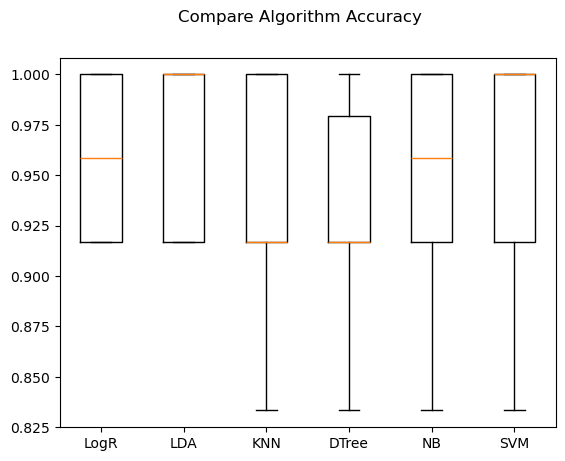

In [9]:
fig = plt.figure()
fig.suptitle('Compare Algorithm Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

### Comentario

Se utiliza `sklearn.datasets` para cargar el clásico dataset Iris, el cual contiene características de 150 flores clasificadas en tres especies. Se transforma en un `DataFrame` y se inspeccionan sus dimensiones y primeras filas para asegurar una correcta carga.

Con `scatter_matrix`, se visualiza la relación entre las variables y cómo se distribuyen según la especie (target). Se observa que *setosa* es claramente separable, mientras que *versicolor* y *virginica* muestran mayor solapamiento, lo que puede dificultar su clasificación.

Se divide el conjunto Iris en entrenamiento y prueba con un 80-20% mediante `train_test_split`, asegurando reproducibilidad con `random_state=0`. Esto permite evaluar la capacidad de generalización de los modelos.

Se prueban varios algoritmos (Logistic Regression, LDA, KNN, Decision Tree, Naive Bayes, SVM) usando validación cruzada de 10 folds. Los resultados se representan con un `boxplot` para comparar estabilidad y rendimiento.

LDA y Logistic Regression destacan con alta precisión y baja varianza, indicando modelos robustos.

### Testeando el modelo seleccionado

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



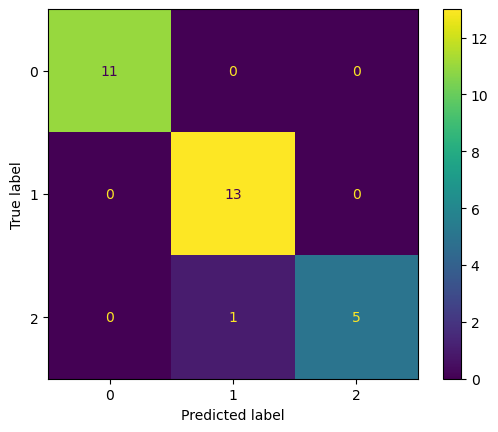

In [11]:
clf = naive_bayes.GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [12]:
# Save model into disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9666666666666667


### Comentario
Se entrena un modelo GaussianNB y se evalúa con:
- **Matriz de confusión**: indica pocos errores de clasificación.
- **Accuracy**: ~96.7%, valor elevado.
- **Reporte de clasificación**: muestra métricas por clase (precision, recall, F1), destacando el buen rendimiento en todas.

Se guarda el modelo con `pickle` y se vuelve a cargar para probar su integridad. Se confirma que la puntuación sobre el conjunto de prueba no varía, validando la persistencia del modelo.

### Predicción de préstamos: Análisis de datos

In [14]:
# The observed file contains observations on customers that applied for a loan (accepted = Y)
obs = pd.read_csv('loan_observed.csv')
obs.head()

# The new file contains applications from new customers, which do not include the loan status (target)
new = pd.read_csv('loan_new.csv')
new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [15]:
# Make a copy of the original data before modifying it
obs_original = obs.copy()
new_original = new.copy()

In [16]:
# Show all variables in the obs dataset
obs.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
# Show all variables in the new dataset
new.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [18]:
# Show the type of each variable in the obs dataset
obs.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
# Show how many rows and columns are in the obs dataset
obs.shape

(614, 13)

In [20]:
# Show how many rows and columns are in the new dataset
new.shape

(367, 12)

In [21]:
# Count values in the target (dependent) variable
obs['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [22]:
# Compute percentages
obs['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

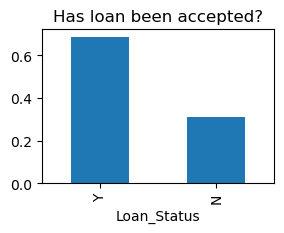

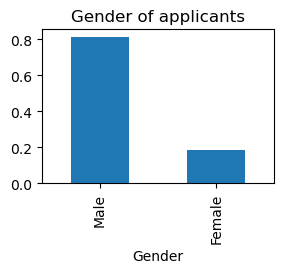

In [23]:
plt.rcParams['figure.figsize'] = (3, 2)

obs['Loan_Status'].value_counts(normalize=True).plot.bar(title='Has loan been accepted?')
plt.show()

obs['Gender'].value_counts(normalize=True).plot.bar(title='Gender of applicants');

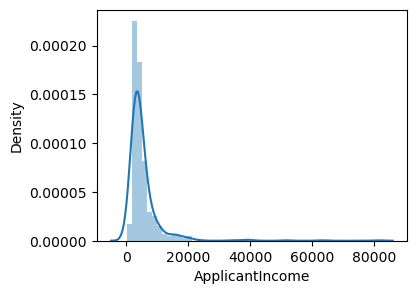

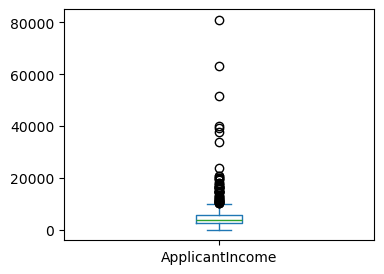

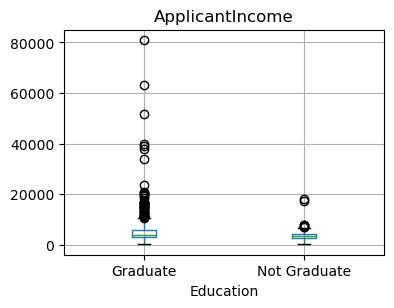

In [24]:
plt.rcParams['figure.figsize'] = (4, 3)

# Plot distribution and boxplot for income
sns.distplot(obs['ApplicantIncome'])
plt.show()

obs['ApplicantIncome'].plot.box()
plt.show()

# Separate incomes by education
obs.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')
plt.show()

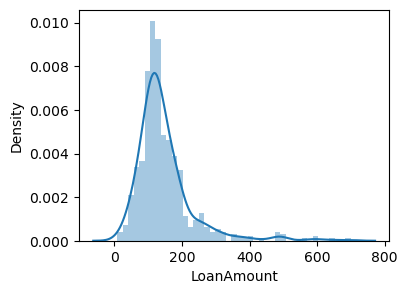

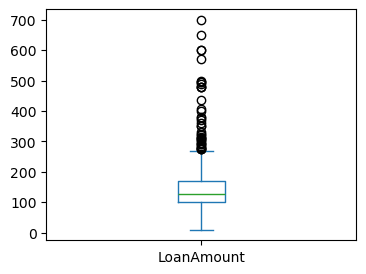

In [25]:
# Plot distribution and boxplot for 'loan amount' without NA values
obs.notna()
sns.distplot(obs['LoanAmount'])
plt.show()

obs['LoanAmount'].plot.box()
plt.show()


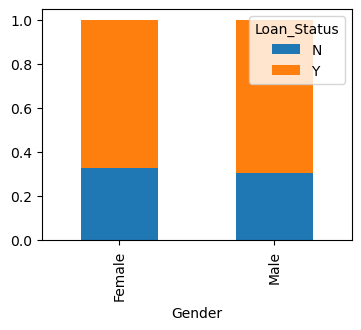

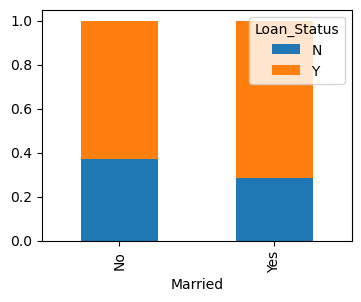

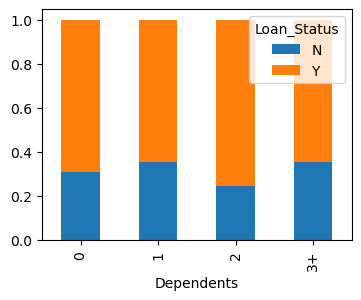

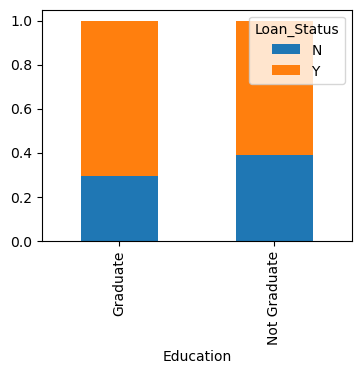

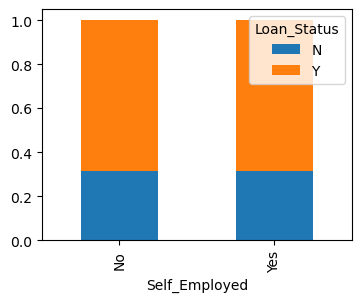

In [26]:
# Show the proportion of approved / non-approved loans by gender
Gender = pd.crosstab(obs['Gender'], obs['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

Married = pd.crosstab(obs['Married'], obs['Loan_Status'])
Dependents = pd.crosstab(obs['Dependents'], obs['Loan_Status'])
Education = pd.crosstab(obs['Education'], obs['Loan_Status'])
SelfEmp = pd.crosstab(obs['Self_Employed'], obs['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()
SelfEmp.div(SelfEmp.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()


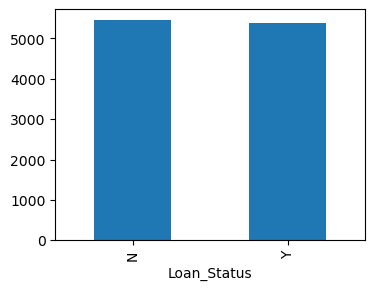

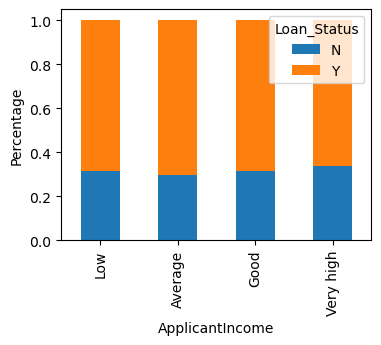

In [27]:
# Plot the average income of applicants by 'loan status'
obs.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

# Check if the loan status depends on the applicant income
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'Good', 'Very high']
obs['IncomeBin'] = pd.cut(obs['ApplicantIncome'], bins, labels=group)

IB = pd.crosstab(obs['IncomeBin'], obs['Loan_Status'])
IB.div(IB.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()


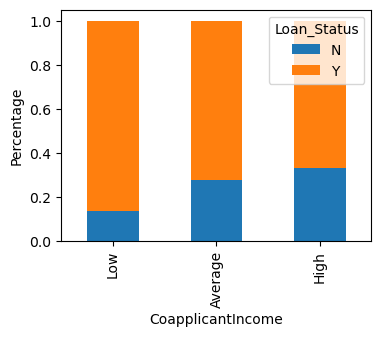

In [28]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
obs['CoapplicantIB'] = pd.cut(obs['CoapplicantIncome'], bins, labels=group)
CIB = pd.crosstab(obs['CoapplicantIB'], obs['Loan_Status'])
CIB.div(CIB.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

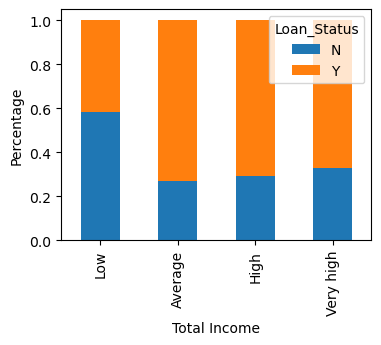

In [29]:
# Combine applicant's and co-applicant's income to see effects on loan approval
obs['TotalIncome'] = obs['ApplicantIncome'] + obs['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
obs['TotalIB'] = pd.cut(obs['TotalIncome'], bins, labels=group)
TIB = pd.crosstab(obs['TotalIB'], obs['Loan_Status'])
TIB.div(TIB.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
P = plt.ylabel('Percentage')

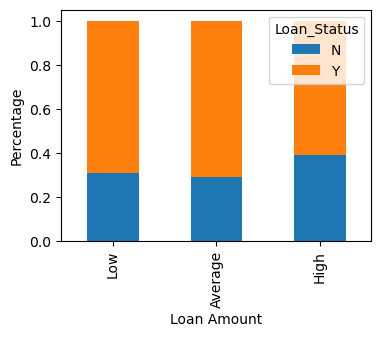

In [30]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
obs['LoanAmountBin'] = pd.cut(obs['LoanAmount'], bins, labels=group)
LAB = pd.crosstab(obs['LoanAmountBin'], obs['Loan_Status'])
LAB.div(LAB.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Loan Amount')
P = plt.ylabel('Percentage')

### Predicción de préstamos: Ajuste del modelo

In [32]:
# Split the obs data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model 1: Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
y_pred[:20] # print the first 20 predicted values


Accuracy: 0.9777777777777777


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [33]:
# Model 2: Decision Tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
y_pred[:20] # print the first 20 predicted values


Accuracy: 0.9777777777777777


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [34]:
# Model 3: Random Forest
clf = RandomForestClassifier(random_state=1, max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
y_pred[:20] # print the first 20 predicted values


Accuracy: 0.9777777777777777


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [35]:
# Model 4: Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred[:20]  # print the first 20 predicted values


Accuracy: 1.0


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [36]:
# Model 5: Support Vector Machine
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred[:20]  # print the first 20 predicted values


Accuracy: 0.9777777777777777


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [37]:
# Model 6: XGBOOST
# use first: conda install -c anaconda py-xgboost
clf = XGBClassifier(n_estimators=50, max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred[:20]  # print the first 20 predicted values

Accuracy: 0.9777777777777777


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

### Comentario

Se cargan dos archivos:  
- `loan_observed.csv`: contiene información de clientes y si su préstamo fue aprobado (`Loan_Status`).  
- `loan_new.csv`: nuevos solicitantes sin estado de aprobación.

Se revisan estructuras, tipos de datos y distribución inicial (68% aprobados).

Se explora:
- `ApplicantIncome`: distribución sesgada con outliers.  
- `LoanAmount`: también presenta valores extremos.  
- Se agrupan ingresos y se analiza su relación con `Loan_Status`.  
  - A mayor ingreso total o del co-solicitante, mayor tasa de aprobación.  
  - Montos de préstamo más altos tienden a tasas de aprobación menores.

Se transforman variables categóricas (`Gender`, `Married`, etc.) a formato numérico y se eliminan columnas derivadas. Se genera una matriz de correlación:

- **Credit_History** es el predictor más fuerte de aprobación.
- Ingresos y montos muestran correlaciones bajas con el target.

Se prueban seis modelos sobre el dataset de préstamos, obteniendo:

| Modelo              | Accuracy |
|---------------------|----------|
| Logistic Regression | 0.827    |
| Naive Bayes         | 0.822    |
| Random Forest       | 0.816    |
| XGBoost             | 0.795    |
| SVM                 | 0.724    |
| Decision Tree       | 0.713    |

**Logistic Regression** y **Naive Bayes** ofrecen el mejor rendimiento sin excesiva complejidad.

Se reutiliza el modelo de Logistic Regression entrenado con todos los datos para predecir `Loan_Status` en nuevos clientes.  
Resultados:
- Se convierten las predicciones a `Y` / `N`.
- El 83% fue clasificado como aprobado.
- Los resultados se exportan como `new_predicted.csv` para uso externo.